In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-07-24 06:10:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  65.9MB/s    in 1.0s    

2023-07-24 06:10:47 (65.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



the content of the zip is extracted to the base directory /tmp/cats_and_dogs_filtered.zip. The extracted file contains training and validation data separately, which in turn each contain cats and dogs.



In [2]:
import os   #provides functions for interacting with the operating system
import zipfile

#unzipping files
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Defining each sub directory

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#directory with training cat images
train_cat_dir = os.path.join(train_dir, 'cats')

#directory with training dog images
train_dog_dir = os.path.join(train_dir, 'dogs')

#directory with validation cat images
validation_cat_dir = os.path.join(validation_dir, 'cats')

#directory with training cat images
validation_dog_dir = os.path.join(validation_dir, 'dogs')


checking the file names in the cats and dogs directory

In [ ]:
train_cat_fnames = os.listdir(train_cat_dir)
train_cat_fnames.sort()
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dog_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Total no of cats and dogs images in the train and validation directories.

In [ ]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Configure matplot


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Setting parameters for the graph; we will output images in a 4x4 configuration
nrows = 4
ncols = 4

#index for iterating over images
img_index = 0


Next displaying **grid of images**. Batch of 8 cats and 8 dog images.

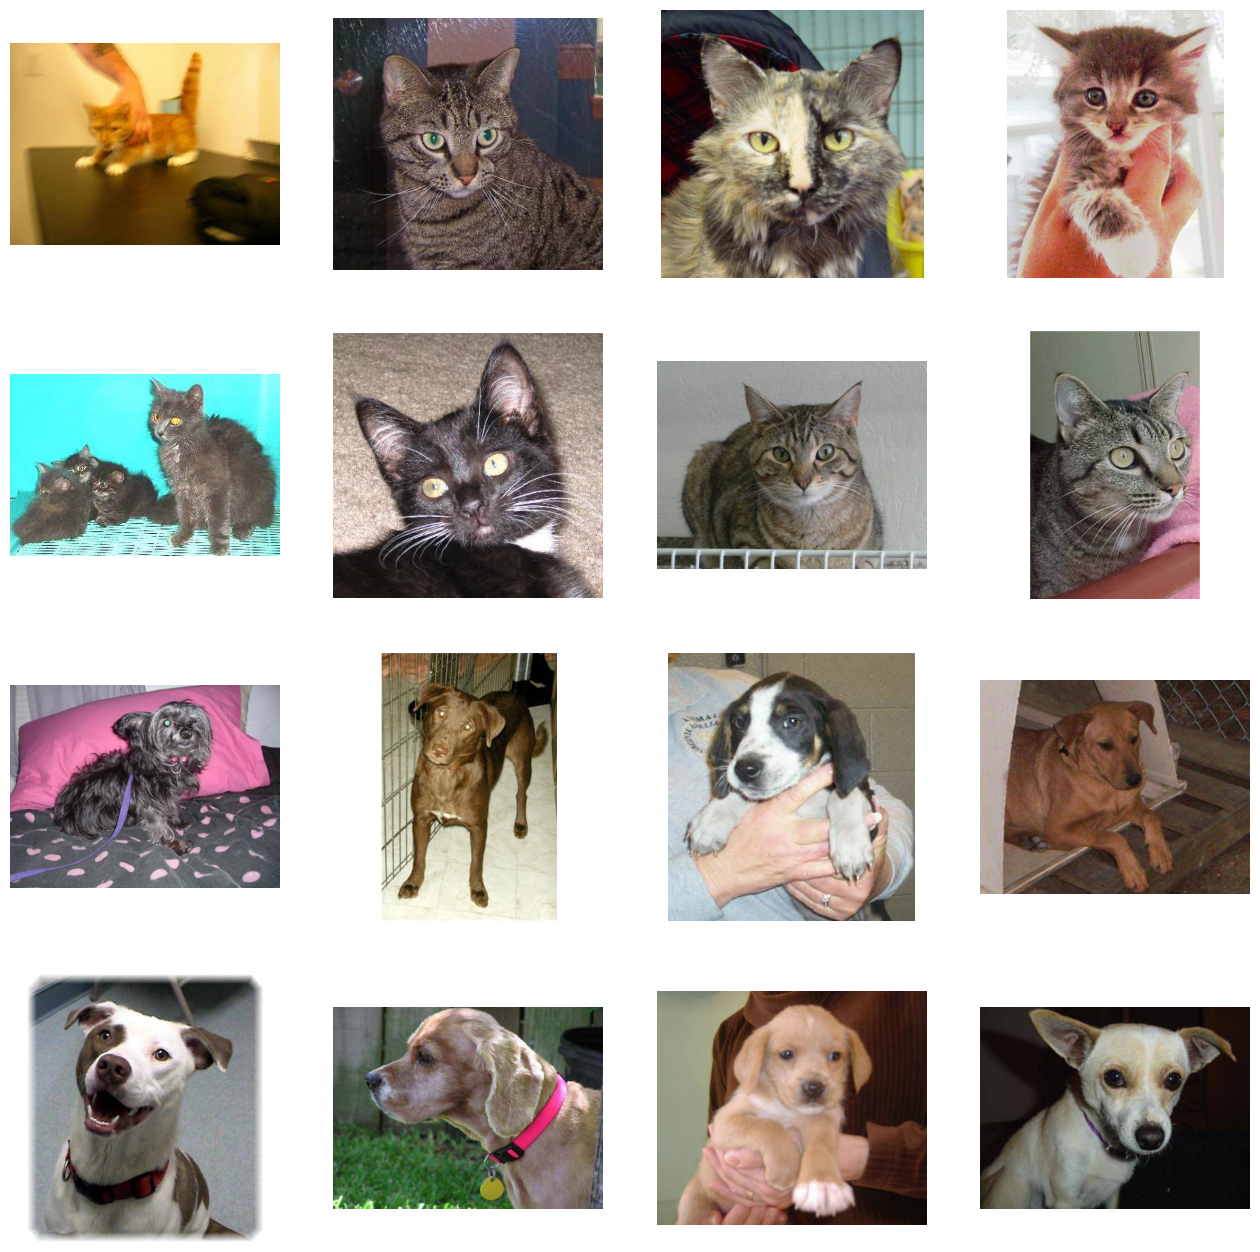

In [ ]:
#setup matplotlib figure and size to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

img_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname)
                for fname in train_cat_fnames[img_index-8:img_index]]

next_dog_pix = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_fnames[img_index-8:img_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # setup subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off') # Don't show axes for gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Building a small CNN from scratch to get 72% accuaracy

1. images will be resized to 150x150 before feeding into the neural network

## Architecture

*   Consist of 3 modules (convolution + relu + maxpooling)
*   Convolutions operate at 3x3 windows
*   maxpooling layers operate at 2x2 windows

*   1st convolutional extract 16 filters
*   2nd convolutional extract 32 filters
*   3rd convolutional extract 64 filters


**NOTE**: This is a configuration that is widely used and known to work well for image classification. Also, since we have relatively few training examples (1,000), using just three convolutional modules keeps the model small, which lowers the risk of overfitting


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [5]:
# the input feature map is 150x150x3
# 150x150 is for the image pixel
# 3 is for the 3 colour channels: R G B

img_input = layers.Input(shape=(150, 150, 3))

# 1st convolutional extract 16 filters that is are 3x3
# convolution is followed by max-pooling layer with 2x2 windows
x = layers.Conv2D(16, 3, activation='relu')(img_input)  # creates a 2D convolutional layer with 16 filters/kernels, each having a size of 3x3. The Conv2D layer is used for feature extraction in CNNs.
x = layers.MaxPooling2D(2)(x)

# 2nd convolutional extract 32 filters that is are 3x3
# convolution is followed by max-pooling layer with 2x2 windows
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# 3rd convolutional extract 64 filters that is are 3x3
# convolution is followed by max-pooling layer with 2x2 windows
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

on top of this we put 2 fully connected layers. This is cuz we are facing a 2-class classification problem(binary classification problem).
We will end our network with a sigmoid activation so the output of the network is a singlw scalar between 0 and 1. The output from the hidden layer is then fed into a logistic function like sigmoid or softmax which converts the output of each class into the probability score of each class

In [7]:
# flatten feature map to a 1-dimention tensor so we can add fully connected layers
x = layers.Flatten()(x)

# create a fully connected layer with ReLU activation and 512 hiddem units
x = layers.Dense(512, activation='relu')(x)

# create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully connected layer(dense) + sigmoid output layer
model = Model(img_input, output)


Summarizing model architecture

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1849

here the convolutional layer reduce the size of the feature maps by a bit due to its padding. And each pooling layer halves the feature map.

## Specifications for model training
This is a binary classification problem (cat or dog). Therefore we are using ```binary_crossentropy```loss. And the final activation is a sigmoid.

We will be using ```rmsprop``` optimizer with a learn rate of 0.01. During training we will be monitoring the classification accuracy. RMSprop automates the learning-rate tuning. Possible to use other optimizers such as 'Adam' and 'Adagrad' replacing the RMSprop, as they automatically adapt the learning rate during training.





In [10]:
from tensorflow.keras.optimizers import RMSprop

#specifications for model
model.compile(loss = 'binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

##Data Preprocessing
 Setting up data generators that will read pictures in our source folder.

 1. Convert images to float32 tensors and feed them with their labels to the network.
 2. One generator assigned for the trainng images. Second generator assigned for validation images. A generator will yield a batch of 20 images of size 150x150 with their labels.


 When feeding data into the NN, we will preprocess image by normalizing the pixel values to be [0,1] which originally was in [0,225]. This is done using Keras. The ImageDataGenerator is a powerful utility class in Keras that allows us to perform data augmentation and preprocessing on image data to improve the model's performance and generalization.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# The rescale=1./255 argument means that each pixel value in the images will be divided by 255.
# This operation scales the pixel values to the range [0, 1]. It is a common preprocessing step for image data.
# it makes the optimization process easier and helps to improve convergence during training
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,  # source directory for training imges
    target_size=(150, 150), # all imges are resized to 150x150
    batch_size=20,
    class_mode='binary' # Since we use binary_crossentropy loss, we need binary labels
)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
    validation_dir,  # source directory for validation imges
    target_size=(150, 150), # all imges are resized to 150x150
    batch_size=20,
    class_mode='binary' # Since we use binary_crossentropy loss, we need binary labels
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
